In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch


In [4]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Extracting features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## KMeans Clustering
**How it Works:**  
- KMeans is a centroid-based clustering algorithm.
- It randomly initializes `k` cluster centroids.
- Each point is assigned to the nearest centroid.
- The centroids are updated iteratively until convergence.

**Why KMeans is Suitable for Iris:**  
- The Iris dataset naturally has 3 species (classes).
- KMeans is efficient for medium-sized datasets.


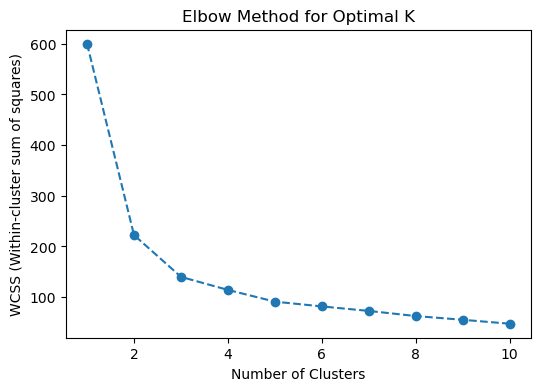

In [11]:
import os
import warnings
from sklearn.cluster import KMeans

os.environ["OMP_NUM_THREADS"] = "1"

warnings.filterwarnings("ignore")

wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [13]:
# Applying KMeans with optimal K 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

X['KMeans_Cluster'] = clusters_kmeans

X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


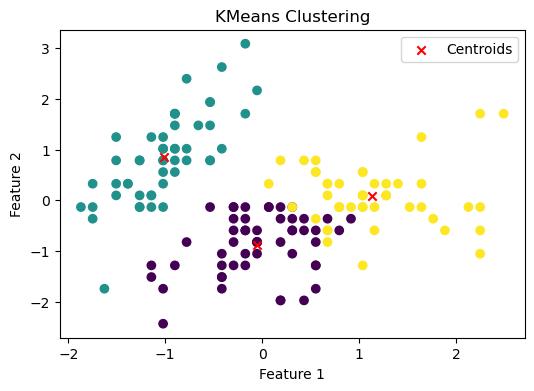

In [15]:
# Visualizing KMeans clusters
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


## Hierarchical Clustering
**How it Works:**  
- This technique builds a hierarchy of clusters.
- It uses either **Agglomerative** (bottom-up) or **Divisive** (top-down) approaches.
- The dendrogram helps determine the number of clusters.

**Why Hierarchical Clustering is Suitable for Iris:**  
- It does not require specifying the number of clusters.
- It helps visualize relationships between clusters.


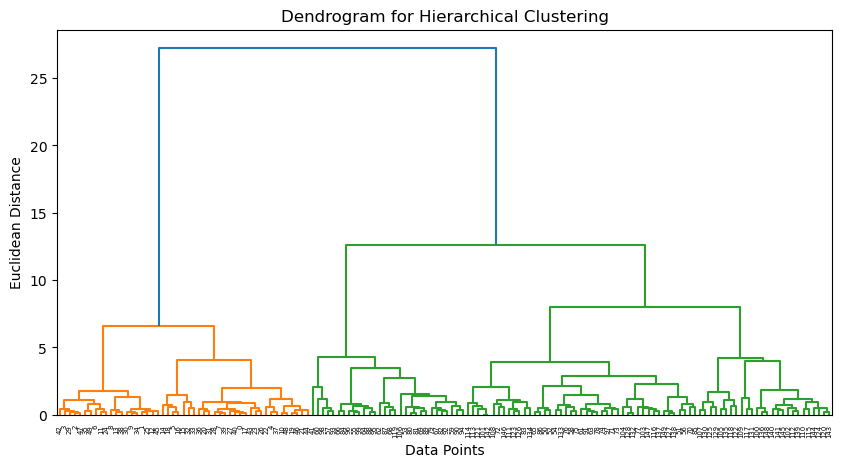

In [18]:
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [24]:
from sklearn.cluster import AgglomerativeClustering

# Applying Hierarchical Clustering with optimal clusters (usually 3 for Iris dataset)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)

X['Hierarchical_Cluster'] = clusters_hc

X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster,Hierarchical_Cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


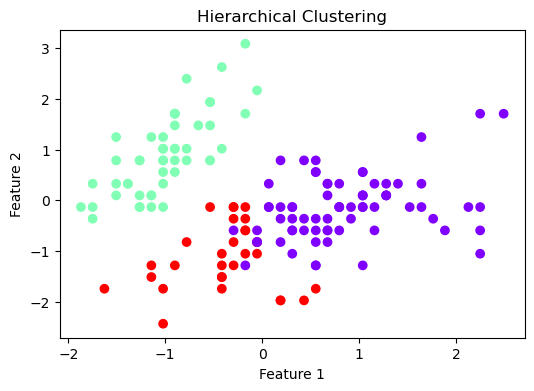

In [26]:
# Visualizing Hierarchical Clustering
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_hc, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()


## Conclusion
- **KMeans clustering** grouped the dataset into 3 clusters efficiently.
- **Hierarchical clustering** also formed 3 clusters, and the dendrogram helped visualize relationships.
- The Iris dataset is well-suited for clustering due to its distinct species groups.

**Final Thoughts:**  
- If scalability is required, KMeans is better.
- If hierarchical relationships are important, Hierarchical Clustering is better.
